In [17]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [18]:
#read html https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html and create dataframe
temp_df = pd.read_html("https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html")[0]
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [19]:
#check datatypes on DF
temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [20]:
#Covert terrestrial_date to date time
temp_df["terrestrial_date"]=pd.to_datetime(temp_df["terrestrial_date"])
temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
#check DF if ever
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


# How many months exist on Mars?

In [22]:
#Check how many months on Mars
len(temp_df["month"].unique())

12

In [24]:
#Check how many months on Mars-option 2

(temp_df["terrestrial_date"].dt.month).unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

### 12 Months Exist on Mars

# How many Martian (and not Earth) days' worth of data exist in the scraped dataset?

In [8]:
#checking how many days in dataset
len(temp_df)

1867

### They are 1867 Martian days in scraped dataset


# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

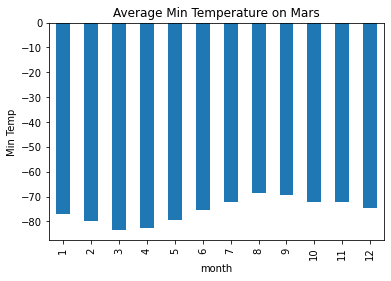

In [10]:
#check min temperature on Mars and plot as bar chart

avg_min_temp = temp_df.groupby("month").mean()["min_temp"]
avg_min_temp.plot.bar()
plt.title("Average Min Temperature on Mars")
plt.ylabel("Min Temp")
plt.savefig('Output/mintemp.png', dpi=300, bbox_inches='tight')

In [11]:
#list all temps per month
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

### Coldest months are 3 and 4 
### Warmest months are 8 and 9

# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

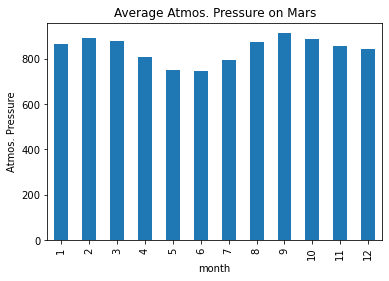

In [12]:
#check average pressure on Mars and plot as bar chart
avg_min_pressure = temp_df.groupby("month").mean()["pressure"]
avg_min_pressure.plot.bar()
plt.title("Average Atmos. Pressure on Mars")
plt.ylabel("Atmos. Pressure")
plt.savefig('Output/pressure.png', dpi=300, bbox_inches='tight')

In [13]:
#list all average pressure per month
avg_min_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

### Lowest pressure months are 5 and 6
### Highest pressure months are 2 and 9

# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.

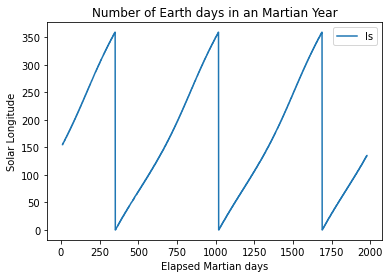

In [16]:
#plot ls-The solar longitude and sol- The number of elapsed sols (Martian days) since Curiosity landed on Mars as line chart.
temp_df.plot(y="ls",x="sol")
plt.title("Number of Earth days in an Martian Year")
plt.ylabel("Solar Longitude")
plt.xlabel("Elapsed Martian days")
plt.savefig('Output/martiandays.png', dpi=300, bbox_inches='tight')

###  The distance between each bottom point counts as Martian year. On Average around 690 terrestrial (Earth) days exist in a Martian year

In [26]:
temp_df.to_csv(r'Output\temp_mars.csv', index = False)